## Imports

In [383]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.ensemble import ExtraTreesClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

## Load dataset

In [384]:
df = pd.read_csv('in-vehicle-coupon-recommendation.csv')
display(list(df.columns.values))
df.rename(columns={"passanger": "passenger"}, inplace=True)
df

['destination',
 'passanger',
 'weather',
 'temperature',
 'time',
 'coupon',
 'expiration',
 'gender',
 'age',
 'maritalStatus',
 'has_children',
 'education',
 'occupation',
 'income',
 'car',
 'Bar',
 'CoffeeHouse',
 'CarryAway',
 'RestaurantLessThan20',
 'Restaurant20To50',
 'toCoupon_GEQ5min',
 'toCoupon_GEQ15min',
 'toCoupon_GEQ25min',
 'direction_same',
 'direction_opp',
 'Y']

destination  passenger weather  temperature  time  \
0      No Urgent Place      Alone   Sunny           55   2PM   
1      No Urgent Place  Friend(s)   Sunny           80  10AM   
2      No Urgent Place  Friend(s)   Sunny           80  10AM   
3      No Urgent Place  Friend(s)   Sunny           80   2PM   
4      No Urgent Place  Friend(s)   Sunny           80   2PM   
...                ...        ...     ...          ...   ...   
12679             Home    Partner   Rainy           55   6PM   
12680             Work      Alone   Rainy           55   7AM   
12681             Work      Alone   Snowy           30   7AM   
12682             Work      Alone   Snowy           30   7AM   
12683             Work      Alone   Sunny           80   7AM   

                      coupon expiration  gender age      maritalStatus  ...  \
0            Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1               Coffee House         2h  Female  21  Unmarried partner  ...   
2      Carry out & Take away         2h  Female  21  Unmarried partner  ...   
3               Coffee House         2h  Female  21  Unmarried partner  ...   
4               Coffee House         1d  Female  21  Unmarried partner  ...   
...                      ...        ...     ...  ..                ...  ...   
12679  Carry out & Take away         1d    Male  26             Single  ...   
12680  Carry out & Take away         1d    Male  26             Single  ...   
12681           Coffee House         1d    Male  26             Single  ...   
12682                    Bar         1d    Male  26             Single  ...   
12683      Restaurant(20-50)         2h    Male  26             Single  ...   

       CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
0            never       NaN                  4~8              1~3   
1            never       NaN                  4~8              1~3   
2            never       NaN                  4~8              1~3   
3            never       NaN                  4~8              1~3   
4            never       NaN                  4~8              1~3   
...            ...       ...                  ...              ...   
12679        never       1~3                  4~8              1~3   
12680        never       1~3                  4~8              1~3   
12681        never       1~3                  4~8              1~3   
12682        never       1~3                  4~8              1~3   
12683        never       1~3                  4~8              1~3   

      toCoupon_GEQ5min toCoupon_GEQ15min toCoupon_GEQ25min direction_same  \
0                    1                 0                 0              0   
1                    1                 0                 0              0   
2                    1                 1                 0              0   
3                    1                 1                 0              0   
4                    1                 1                 0              0   
...                ...               ...               ...            ...   
12679                1                 0                 0              1   
12680                1                 0                 0              0   
12681                1                 0                 0              1   
12682                1                 1                 1              0   
12683                1                 0                 0              1   

      direction_opp  Y  
0                 1  1  
1                 1  0  
2                 1  1  
3                 1  0  
4                 1  0  
...             ... ..  
12679             0  1  
12680             1  1  
12681             0  0  
12682             1  0  
12683             0  0  

[12684 rows x 26 columns]

## Fill missing values in data
- Count NAs per column
- Make a list of columns containing NAs
- Do not list columns containing more than 50% NAs<br>(insufficient data for replacement)
- Replace NAs with mode in all listed columns

(only to be used for categorical features,<br>numerical ones would require selecting the mean)

In [385]:
df.isna().sum()

destination                 0
passenger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [386]:
columns_withNA = []

for index, value in df.isna().sum().items():
    if value>0 and value < (df.shape[0] / 2):
        columns_withNA.append(index)
print(columns_withNA)

for column in columns_withNA:
    print('Column is: ' + column)
    print('Mode is: ' + df[column].mode()[0])
    print()
    df[column] = df[column].fillna( df[column].mode()[0])

df.isna().sum()

['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
Column is: Bar
Mode is: never

Column is: CoffeeHouse
Mode is: less1

Column is: CarryAway
Mode is: 1~3

Column is: RestaurantLessThan20
Mode is: 1~3

Column is: Restaurant20To50
Mode is: less1



destination                 0
passenger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                         0
CoffeeHouse                 0
CarryAway                   0
RestaurantLessThan20        0
Restaurant20To50            0
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

## One-hot-encoding
- make a list of all categorical features
- get an overview of occurring values
- drop all binary labeled features (already OHE)
- for each feature create new columns, one for each distinct value using pd.get_dummies()<br>
'FEATURE_IS_VALUE' (e.g. 'destination_IS_Home')

In [387]:
dfOHE = df
featuresToBeOHE = df.columns.drop('temperature')

for feature in featuresToBeOHE:
    print('Current feature: ' + feature)
    valueArray = df[feature].value_counts(dropna=False).index
    for value in valueArray:
        print(value)
    print()

featuresToBeOHE = featuresToBeOHE.drop(labels=['has_children', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Y'])
print(featuresToBeOHE)

Current feature: destination
No Urgent Place
Home
Work

Current feature: passenger
Alone
Friend(s)
Partner
Kid(s)

Current feature: weather
Sunny
Snowy
Rainy

Current feature: time
6PM
7AM
10AM
2PM
10PM

Current feature: coupon
Coffee House
Restaurant(<20)
Carry out & Take away
Bar
Restaurant(20-50)

Current feature: expiration
1d
2h

Current feature: gender
Female
Male

Current feature: age
21
26
31
50plus
36
41
46
below21

Current feature: maritalStatus
Married partner
Single
Unmarried partner
Divorced
Widowed

Current feature: has_children
0
1

Current feature: education
Some college - no degree
Bachelors degree
Graduate degree (Masters or Doctorate)
Associates degree
High School Graduate
Some High School

Current feature: occupation
Unemployed
Student
Computer & Mathematical
Sales & Related
Education&Training&Library
Management
Office & Administrative Support
Arts Design Entertainment Sports & Media
Business & Financial
Retired
Food Preparation & Serving Related
Healthcare Practiti

In [388]:
dfOHE = pd.get_dummies(dfOHE, prefix_sep='_IS_', columns=featuresToBeOHE, dummy_na=False)
buffer = dfOHE.pop('Y')
dfOHE['Y'] = buffer
dfOHE.head()


temperature  has_children  toCoupon_GEQ5min  toCoupon_GEQ15min  \
0           55             1                 1                  0   
1           80             1                 1                  0   
2           80             1                 1                  1   
3           80             1                 1                  1   
4           80             1                 1                  1   

   toCoupon_GEQ25min  direction_same  direction_opp  destination_IS_Home  \
0                  0               0              1                    0   
1                  0               0              1                    0   
2                  0               0              1                    0   
3                  0               0              1                    0   
4                  0               0              1                    0   

   destination_IS_No Urgent Place  destination_IS_Work  ...  \
0                               1                    0  ...   
1                               1                    0  ...   
2                               1                    0  ...   
3                               1                    0  ...   
4                               1                    0  ...   

   RestaurantLessThan20_IS_4~8  RestaurantLessThan20_IS_gt8  \
0                            1                            0   
1                            1                            0   
2                            1                            0   
3                            1                            0   
4                            1                            0   

   RestaurantLessThan20_IS_less1  RestaurantLessThan20_IS_never  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   

   Restaurant20To50_IS_1~3  Restaurant20To50_IS_4~8  Restaurant20To50_IS_gt8  \
0                        1                        0                        0   
1                        1                        0                        0   
2                        1                        0                        0   
3                        1                        0                        0   
4                        1                        0                        0   

   Restaurant20To50_IS_less1  Restaurant20To50_IS_never  Y  
0                          0                          0  1  
1                          0                          0  0  
2                          0                          0  1  
3                          0                          0  0  
4                          0                          0  0  

[5 rows x 115 columns]

## Train-Test-Split

In [389]:
df_train, df_test = train_test_split(dfOHE, random_state=257)
X_train = df_train.drop(columns=['Y'])
y_train = df_train['Y']

df_test = df_test.dropna()
X_test = df_test.drop(columns=['Y'])
y_test = df_test['Y']

## Scaling

In [390]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

## Feature Selection
#### 1. Univariate Selection

In [391]:
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X_train, y_train)
dfcolumns = pd.DataFrame(X_train.columns)
dfscores = pd.DataFrame(fit.scores_)

featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Feature', 'Score']
print('Top 20 Features:')
print(featureScores.nlargest(20, 'Score'))
print('\n\nBottom 10 Features:')
print(featureScores.nsmallest(10, 'Score'))

Top 20 Features:
                            Feature       Score
0                       temperature  211.388293
23  coupon_IS_Carry out & Take away  203.581136
26        coupon_IS_Restaurant(<20)  165.959110
22                    coupon_IS_Bar  162.123273
98             CoffeeHouse_IS_never  120.945825
11           passenger_IS_Friend(s)  108.712940
94               CoffeeHouse_IS_1~3   94.383038
4                 toCoupon_GEQ25min   90.365798
8    destination_IS_No Urgent Place   86.528807
28                 expiration_IS_2h   85.798154
25      coupon_IS_Restaurant(20-50)   78.233467
27                 expiration_IS_1d   67.853547
24           coupon_IS_Coffee House   56.150043
19                      time_IS_2PM   50.225508
14                 weather_IS_Rainy   45.712010
9               destination_IS_Work   42.745865
21                      time_IS_7AM   42.745865
10               passenger_IS_Alone   41.846316
7               destination_IS_Home   40.397402
15                 weat

#### 2. Feature Importance

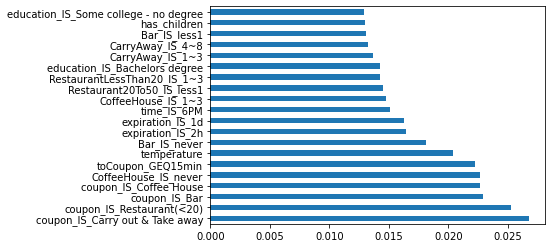

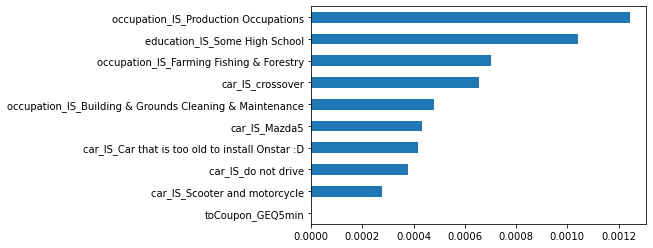

In [392]:
model = ExtraTreesClassifier()
model.fit(X_train, y_train)
#print(model.feature_importances_)

feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

feat_importances.nsmallest(10).plot(kind='barh')
plt.show()

#### 3. Correlation Matrix with Heatmap

In [393]:
corrmatrix = df_train.corr()
top_corr_features = corrmatrix.index

In [394]:
corrmatrix

temperature  has_children  toCoupon_GEQ5min  \
temperature                   1.000000     -0.020133               NaN   
has_children                 -0.020133      1.000000               NaN   
toCoupon_GEQ5min                   NaN           NaN               NaN   
toCoupon_GEQ15min            -0.160839      0.080594               NaN   
toCoupon_GEQ25min            -0.219289     -0.014524               NaN   
...                                ...           ...               ...   
Restaurant20To50_IS_4~8      -0.044398      0.042976               NaN   
Restaurant20To50_IS_gt8       0.000839     -0.047531               NaN   
Restaurant20To50_IS_less1    -0.040174      0.035422               NaN   
Restaurant20To50_IS_never     0.045513     -0.030952               NaN   
Y                             0.062055     -0.038390               NaN   

                           toCoupon_GEQ15min  toCoupon_GEQ25min  \
temperature                        -0.160839          -0.219289   
has_children                        0.080594          -0.014524   
toCoupon_GEQ5min                         NaN                NaN   
toCoupon_GEQ15min                   1.000000           0.325026   
toCoupon_GEQ25min                   0.325026           1.000000   
...                                      ...                ...   
Restaurant20To50_IS_4~8            -0.012048          -0.015383   
Restaurant20To50_IS_gt8            -0.017895          -0.002093   
Restaurant20To50_IS_less1           0.011073           0.010438   
Restaurant20To50_IS_never           0.000329           0.010600   
Y                                  -0.088193          -0.103856   

                           direction_same  direction_opp  destination_IS_Home  \
temperature                      0.100373      -0.100373            -0.058629   
has_children                    -0.031861       0.031861            -0.007245   
toCoupon_GEQ5min                      NaN            NaN                  NaN   
toCoupon_GEQ15min               -0.309845       0.309845            -0.134776   
toCoupon_GEQ25min               -0.194286       0.194286             0.050982   
...                                   ...            ...                  ...   
Restaurant20To50_IS_4~8          0.015600      -0.015600             0.005760   
Restaurant20To50_IS_gt8         -0.003330       0.003330            -0.000214   
Restaurant20To50_IS_less1       -0.017881       0.017881            -0.010672   
Restaurant20To50_IS_never        0.018765      -0.018765             0.008297   
Y                                0.016118      -0.016118            -0.075542   

                           destination_IS_No Urgent Place  \
temperature                                      0.137448   
has_children                                     0.025564   
toCoupon_GEQ5min                                      NaN   
toCoupon_GEQ15min                                0.039906   
toCoupon_GEQ25min                               -0.360750   
...                                                   ...   
Restaurant20To50_IS_4~8                          0.004498   
Restaurant20To50_IS_gt8                         -0.001604   
Restaurant20To50_IS_less1                        0.005620   
Restaurant20To50_IS_never                       -0.021058   
Y                                                0.133543   

                           destination_IS_Work  ...  \
temperature                          -0.099054  ...   
has_children                         -0.022091  ...   
toCoupon_GEQ5min                           NaN  ...   
toCoupon_GEQ15min                     0.089251  ...   
toCoupon_GEQ25min                     0.363100  ...   
...                                        ...  ...   
Restaurant20To50_IS_4~8              -0.010937  ...   
Restaurant20To50_IS_gt8               0.002056  ...   
Restaurant20To50_IS_less1             0.004243  ...   
Restaurant20To50_IS_never             0.015862  ...   
Y                     

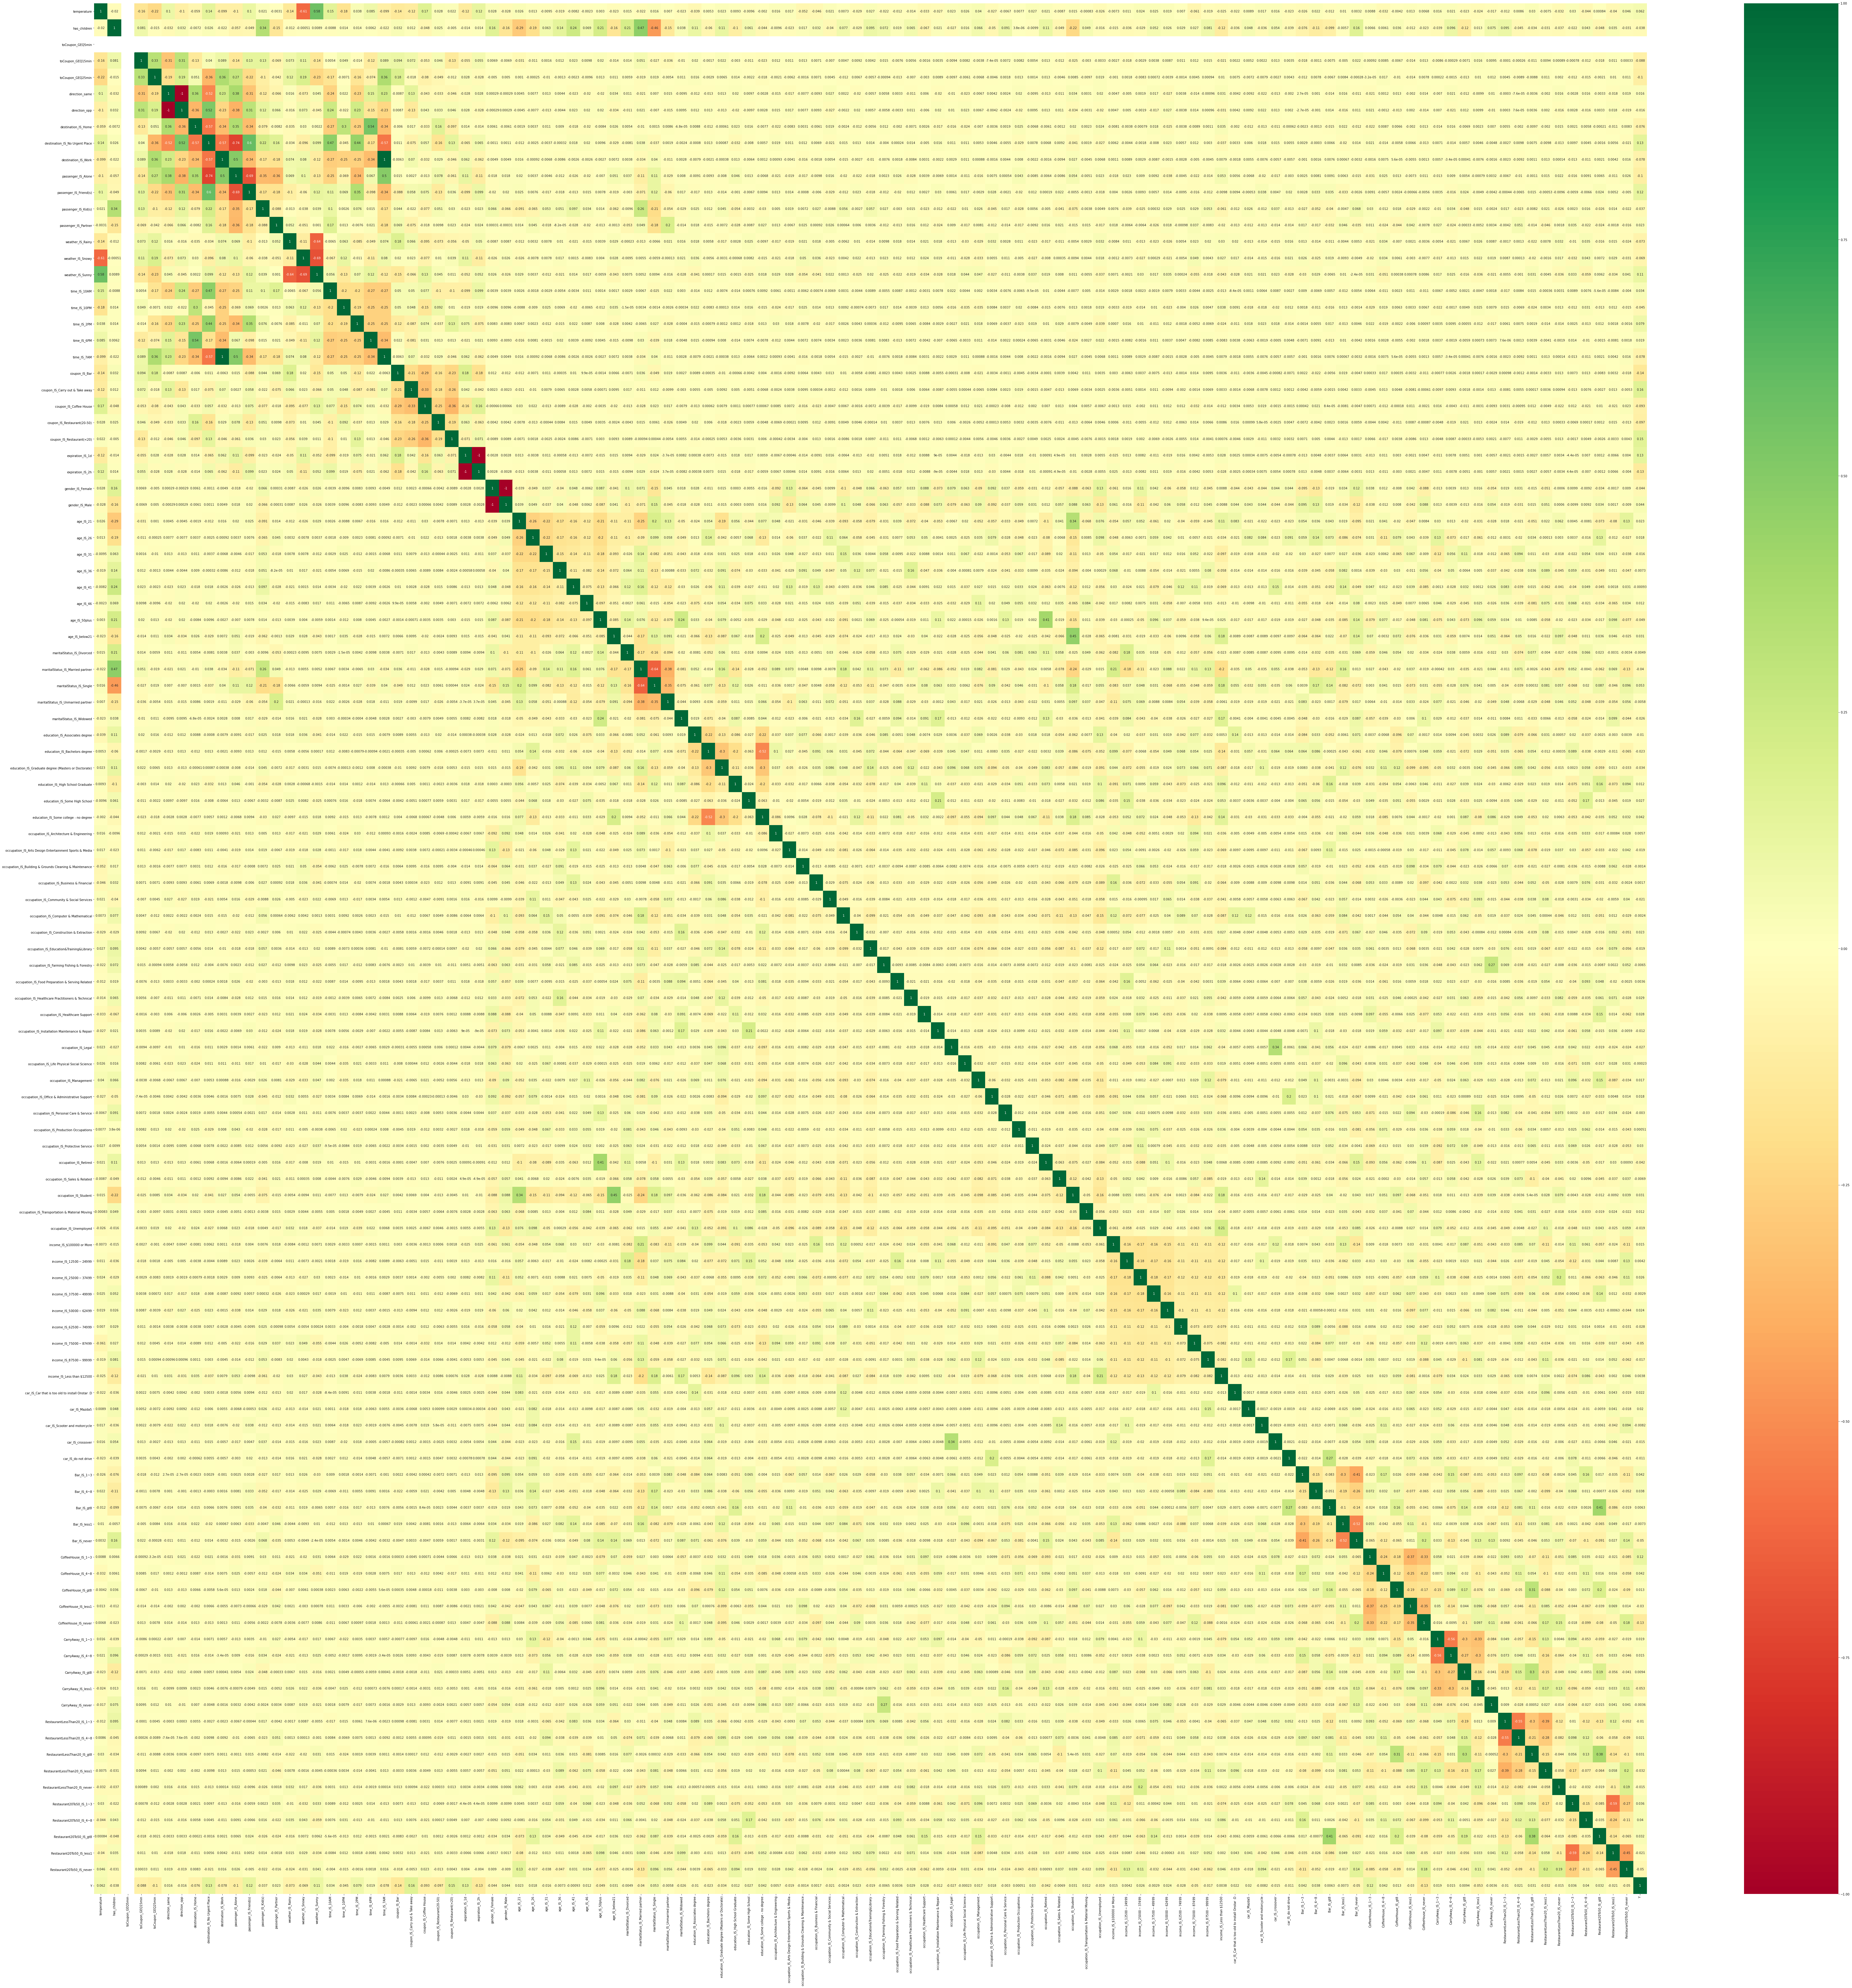

In [395]:
plt.figure(figsize=(115,115))
g=sns.heatmap(df_train[top_corr_features].corr(), annot=True, cmap='RdYlGn')

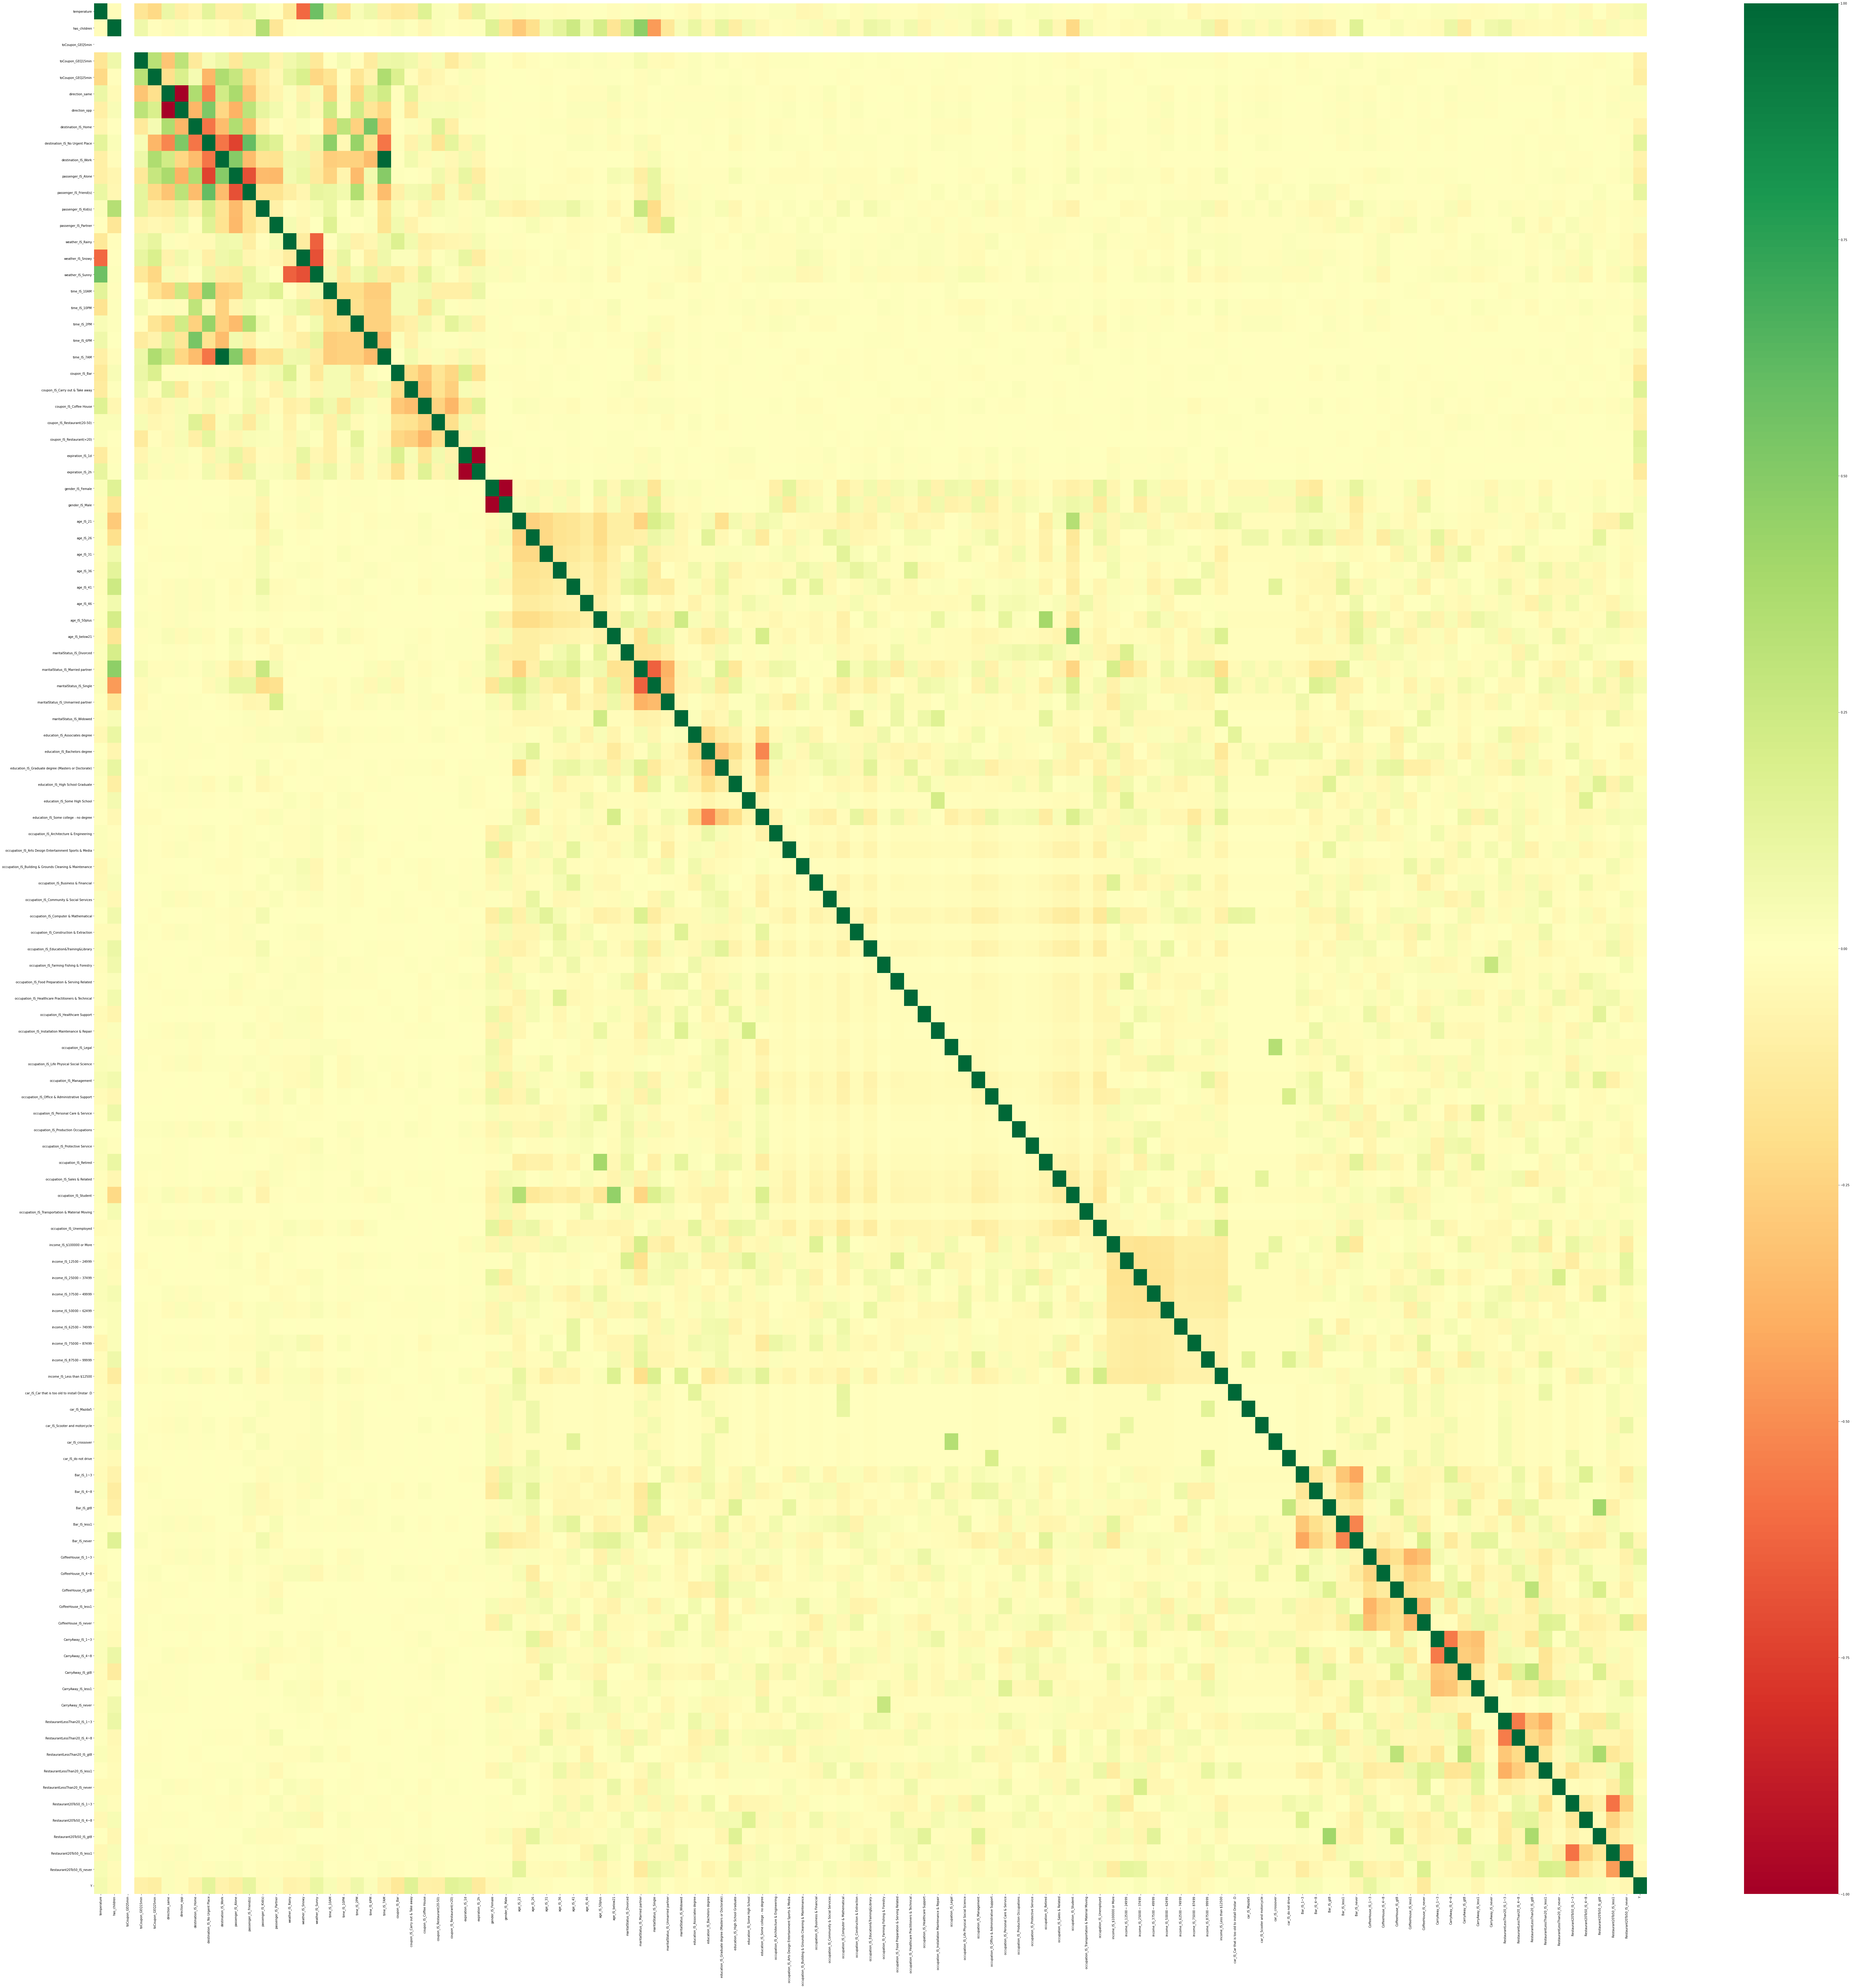

In [396]:
plt.figure(figsize=(115,115))
g=sns.heatmap(df_train[top_corr_features].corr(), annot=False, cmap='RdYlGn')